In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(context="paper", rc={"font.size": 10})

w = 3.487
h = w / 1.618

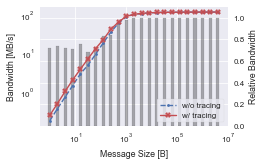

In [2]:
data = np.loadtxt("liboxton_bandwidth.csv", delimiter=",", skiprows=1)

fig, ax1 = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.20, right=.88, top=.97)
ax2 = ax1.twinx()

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("Bandwidth [MB/s]")
ax2.set_xscale("log")
ax2.set_yscale("log")

pal = sns.color_palette()

ax2.plot(data[:,0], data[:,2], color=pal[0], ls="--", marker=".", label="w/o tracing")
ax2.plot(data[:,0], data[:,1], color=pal[2], marker="X", label="w/ tracing")
ax2.legend(frameon=True)
ax2.grid(False)

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_ylabel("Relative Bandwidth")
ax1.set_yscale("linear")
ax1.set_ylim((0,1.1))
ax1.set_xlabel("Message Size [B]")

width = 6e-2
x = data[:,0]
y = data[:,2] / data[:,1]

for i in range(len(x)):
    ax1.fill([10**(np.log10(x[i])-width), 10**(np.log10(x[i])-width), 10**(np.log10(x[i])+width), 10**(np.log10(x[i])+width)],
                 [0, y[i], y[i], 0],
                 color="k", alpha=0.3, zorder=10)

fig.set_size_inches(w, h)
fig.savefig("bandwidth_overhead.pdf")

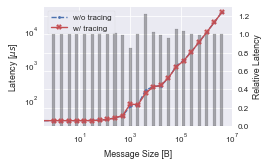

In [3]:
data = np.loadtxt("liboxton_latency.csv", delimiter=",", skiprows=1)

fig, ax1 = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.20, right=.88, top=.97)
ax2 = ax1.twinx()

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("Latency [$\mu s$]")
ax2.set_xscale("log")
ax2.set_yscale("log")

pal = sns.color_palette()

ax2.plot(data[:,0], data[:,2], color=pal[0], ls="--", marker=".", label="w/o tracing")
ax2.plot(data[:,0], data[:,1], color=pal[2], marker="X", label="w/ tracing")
ax2.legend(frameon=True)
ax2.grid(False)

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_xlabel("Message Size [B]")
ax1.set_ylabel("Relative Latency")
ax1.set_yscale("linear")
ax1.set_ylim((0,1.3))

width = 6e-2
x = data[1:,0]
y = data[1:,2] / data[1:,1]

for i in range(len(x)):
    ax1.fill([10**(np.log10(x[i])-width), 10**(np.log10(x[i])-width), 10**(np.log10(x[i])+width), 10**(np.log10(x[i])+width)],
                 [0, y[i], y[i], 0],
                 color="k", alpha=0.3)
    
fig.set_size_inches(w, h)
fig.savefig("latency_overhead.pdf")

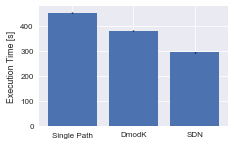

In [11]:
data = np.loadtxt("nas_cg_time.csv", delimiter=",", skiprows=1)
data = data.transpose()
avgs = np.average(data, axis=1)
errs = np.std(data, axis=1)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.20, right=.88, top=.97)
ax.bar(np.arange(avgs.size), avgs, tick_label=["Single Path", "DmodK", "SDN"], yerr=errs)
ax.set_ylabel("Execution Time [s]")

fig.set_size_inches(w, h)
fig.savefig("nas_cg_execution_time.pdf")

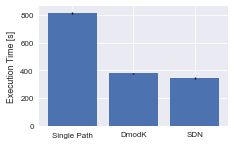

In [12]:
data = np.loadtxt("nersc_milc_time.csv", delimiter=",", skiprows=1)
data = data.transpose()
avgs = np.average(data, axis=1)
errs = np.std(data, axis=1)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.20, right=.88, top=.97)
ax.bar(np.arange(avgs.size), avgs, tick_label=["Single Path", "DmodK", "SDN"], yerr=errs)
ax.set_ylabel("Execution Time [s]")

fig.set_size_inches(w, h)
fig.savefig("nersc_milc_execution_time.pdf")

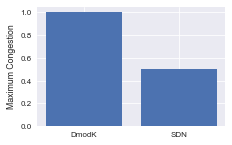

In [13]:
x = np.arange(2)
y= np.array([1, 0.500022154])

fig, ax = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.20, right=.88, top=.97)
ax.bar(x, y, tick_label=["DmodK", "SDN"])
ax.set_ylabel("Maximum Congestion")

fig.set_size_inches(w, h)
fig.savefig("nas_cg_congestion.pdf")

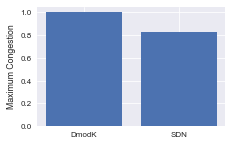

In [14]:
x = np.arange(2)
y= np.array([1, 0.824892101])

fig, ax = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.20, right=.88, top=.97)
ax.bar(x, y, tick_label=["DmodK", "SDN"])
ax.set_ylabel("Maximum Congestion")

fig.set_size_inches(w, h)
fig.savefig("nersc_milc_congestion.pdf")